In [41]:
from diffusers.models import AutoencoderKL
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import to_tensor, to_pil_image
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

pretrained_model_path = "./data/diffusion_weights/stable-diffusion-v1-5"
vae = AutoencoderKL.from_pretrained(pretrained_model_path, subfolder="vae").to("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
import torch
from torchvision.transforms.functional import to_pil_image
from einops import rearrange

def load_and_decode_latent(file_path, vae):
    # Load the latent tensor directly
    latent_tensor = torch.load(file_path)

    # Add batch dimension if it's not present
    if latent_tensor.dim() == 3:
        latent_tensor = latent_tensor.unsqueeze(0)

    # Scale the latents to match VAE's expected distribution
    latent_tensor = 1 / 0.18215 * latent_tensor

    # Ensure the latent tensor is on the same device as the VAE model
    latent_tensor = latent_tensor.to(vae.device)

    # Decode the latent tensor using the VAE
    with torch.no_grad():
        # If you're decoding a single frame, no need to rearrange as in a video
        decoded = vae.decode(latent_tensor).sample

    # Normalize the decoded frames to [0, 1]
    decoded = (decoded / 2 + 0.5).clamp(0, 1)

    # Convert to PIL image for display
    decoded_image = to_pil_image(decoded.squeeze(0))
    
    os.makedirs("final_latents", exist_ok=True)
    destination_path = os.path.join("final_latents", os.path.basename(file_path).split(".")[0]+".png")
    decoded_image.save(destination_path)

    return decoded_image

# Usage example

# latent_file_path = 'temp/final/50_0_5.pt'  # Update this to the actual file path
# decoded_image = load_and_decode_latent(latent_file_path, vae)

# # Display the image
# plt.imshow(decoded_image)
# plt.axis('off')
# plt.show()


In [25]:
# output_image_path = 'output_image.png'
# decoded_image.save(output_image_path)

In [26]:
os.listdir()
# Specify the directory you want to list
folder_path = 'temp/final'

# Get a list of files and directories in the specified directory
entries = os.listdir(folder_path)

# Filter out directories, only keep files
files = [entry for entry in entries if os.path.isfile(os.path.join(folder_path, entry))]
files = [os.path.join('temp/final', file) for file in files]

In [27]:
for file in files:
    # print(file)
    load_and_decode_latent(file, vae)
    

temp/final/10_0_0.pt
temp/final/40_0_5.pt
temp/final/4_0_5.pt
temp/final/42_0_4.pt
temp/final/26_0_3.pt
temp/final/21_0_3.pt
temp/final/45_0_3.pt
temp/final/14_0_3.pt
temp/final/35_0_2.pt
temp/final/23_0_1.pt
temp/final/40_0_2.pt
temp/final/17_0_4.pt
temp/final/38_0_3.pt
temp/final/6_0_0.pt
temp/final/15_0_4.pt
temp/final/27_0_2.pt
temp/final/14_0_0.pt
temp/final/27_0_1.pt
temp/final/49_0_3.pt
temp/final/49_0_0.pt
temp/final/18_0_5.pt
temp/final/24_0_0.pt
temp/final/41_0_4.pt
temp/final/35_0_4.pt
temp/final/28_0_2.pt
temp/final/10_0_4.pt
temp/final/11_0_5.pt
temp/final/24_0_3.pt
temp/final/20_0_3.pt
temp/final/23_0_5.pt
temp/final/16_0_0.pt
temp/final/16_0_1.pt
temp/final/24_0_4.pt
temp/final/7_0_1.pt
temp/final/22_0_4.pt
temp/final/36_0_1.pt
temp/final/2_0_2.pt
temp/final/1_0_3.pt
temp/final/37_0_2.pt
temp/final/27_0_5.pt
temp/final/17_0_3.pt
temp/final/31_0_1.pt
temp/final/31_0_4.pt
temp/final/6_0_2.pt
temp/final/50_0_0.pt
temp/final/40_0_4.pt
temp/final/13_0_5.pt
temp/final/25_0_0.p

In [21]:
# files

In [14]:
# os.path.basename(latent_file_path)

'50_0_5.pt'

In [31]:
image_names = os.listdir("final_latents")

In [37]:
parsed_names = []
for name in image_names:
    parts = name.split('_')
    if len(parts) == 3 and parts[2].split('.')[0].isdigit():
        step = int(parts[0])  # Inference step
        image_number = int(parts[2].split('.')[0])  # Image number
        parsed_names.append((step, image_number, name))

In [39]:
# parsed_names

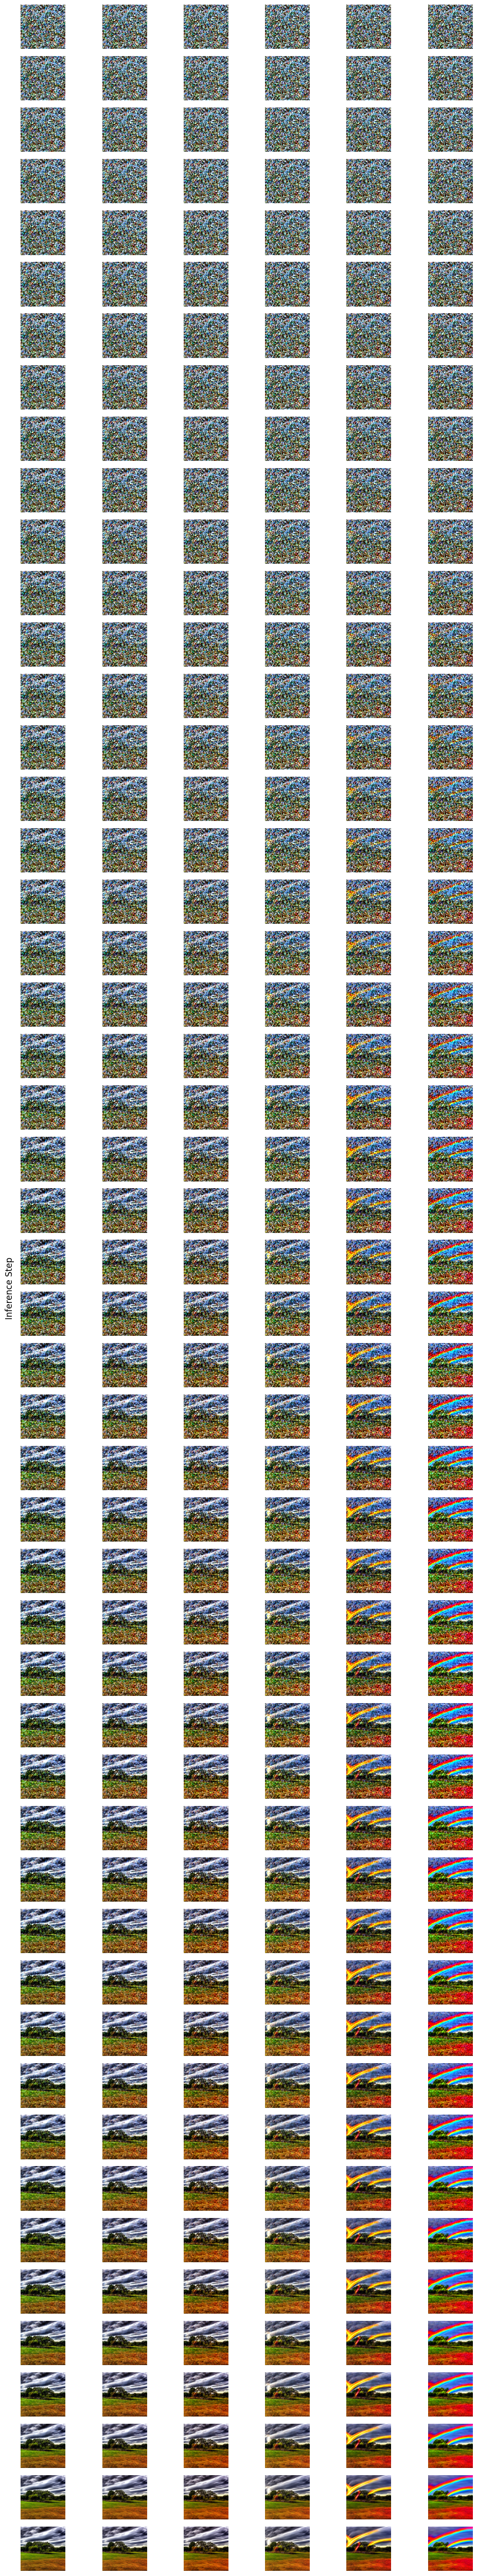

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

parsed_names.sort()

# Adjust figsize to better match the aspect ratio of your images and grid
# The size values (width and height) can be adjusted to better fit your screen and image aspect ratio
fig, axs = plt.subplots(50, 6, figsize=(10, 50))  # Adjusted figsize

for (step, img_num, filename) in parsed_names:
    ax = axs[step - 1, img_num]
    img = mpimg.imread(f'final_latents/{filename}')
    ax.imshow(img)
    ax.axis('off')  # Hide individual axes

# Set overall figure labels
fig.text(0.04, 0.5, 'Inference Step', ha='center', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)  # Adjust padding
plt.show()


In [ ]:
# Filter out any non-PNG files or unwanted entries
image_files = [f for f in image_names if f.endswith('.png')]

# Parse the file names and sort them
parsed_files = sorted(
    ((int(f.split('_')[0]), int(f.split('_')[2].split('.')[0]), f) for f in image_files),
    key=lambda x: (x[0], x[1])
)

# Create the grid plot
num_steps = 50  # Inference steps
num_images_per_step = 6  # Images per step

fig, axs = plt.subplots(num_steps, num_images_per_step, figsize=(15, 125))

for i in range(num_steps):
    for j in range(num_images_per_step):
        index = i * num_images_per_step + j
        if index < len(parsed_files):
            step, img_num, file_name = parsed_files[index]
            img_path = os.path.join('final_latents', file_name)  # Assuming images are in the current directory
            img = Image.open(img_path)
            axs[i, j].imshow(img)
            axs[i, j].set_title(f'Step {step}, Image {img_num}')
            axs[i, j].axis('off')
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()